In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from PIL import Image
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical,plot_model
import  os

In [7]:
encoder =LabelEncoder()
encoder.fit(['ELACHI', 'NEEM', 'TULASI'])

LabelEncoder()

In [12]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 330.3 kB/s eta 0:01:57
   ---------------------------------------- 0.1/38.6 MB 825.8 kB/s eta 0:00:47
   ---------------------------------------- 0.2/38.6 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.3/38.6 MB 2.0 MB/s eta 0:00:19
    --------------------------------------- 0.8/38.6 MB 4.3 MB/s eta 0:00:09
   - -------------------------------------- 1.5/38.6 MB 5.9 MB/s eta 0:00:07
   -- ------------------------------------- 2.7/38.6 MB 9.5 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.6 MB 10.3 MB/s eta 0:00:04
   ----- ---------------------------------- 5.6/38.6 MB 14.9 MB/s eta 0:00:03
   -------

In [14]:
# data = []
# result = []
# paths = []

# for medicinal_plant in ['ELACHI', 'NEEM', 'TULASI']:
#     class_index = encoder.transform([medicinal_plant])[0]
#     class_label = to_categorical(class_index,num_classes=3)

#     for r,d,f in os.walk(r"C:\Users\dell\Desktop\MEDICINAL PLANT"):
#         for file in f:
#             if file.lower().endswith(('.jpg' or 'jpeg')):
#                 paths.append(os.path.join(r,file))
    
#     for path in paths:
#         img = Image.open(path)
#         img = img.resize((128,128))
#         img = np.array(img)
#         if img.shape == (128,128,3):
#             data.append(np.array(img))
#             result.append(class_label)

In [13]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical

data = []
result = []

for medicinal_plant in ['ELACHI', 'NEEM', 'TULASI']:
    class_index = encoder.transform([medicinal_plant])[0]
    class_label = to_categorical(class_index, num_classes=3)

    for r, d, f in os.walk(r"C:\Users\dell\Desktop\MEDICINAL PLANT"):
        for file in f:
            if file.lower().endswith(('.jpg', '.jpeg')):  # Use a tuple for multiple file extensions
                path = os.path.join(r, file)
                img = cv2.imread(path)
                # Convert image from BGR to RGB format
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # Resize image
                img = cv2.resize(img, (128, 128))
                if img.shape == (128, 128, 3):
                    data.append(img)
                    result.append(class_label)


In [16]:
data = np.array(data)
data.shape

(4245, 128, 128, 3)

In [18]:
result = np.array(result)
result.shape
result = result.reshape(4245,-1)
result.shape

(4245, 3)

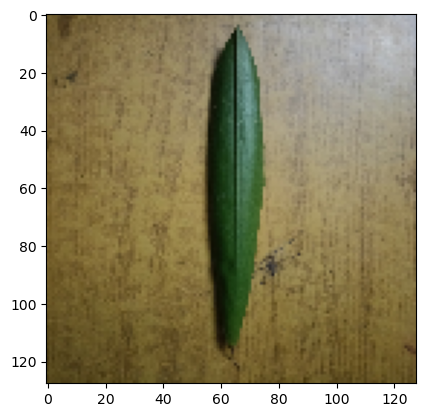

In [19]:
plt.imshow(data[0])

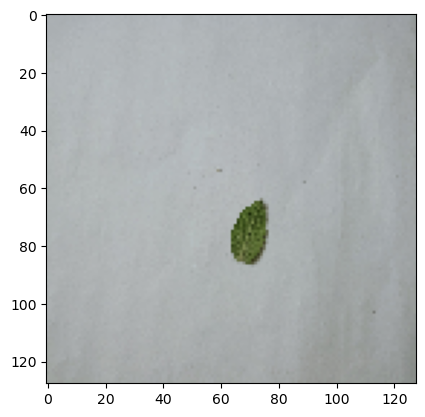

In [20]:
plt.imshow(data[1000])

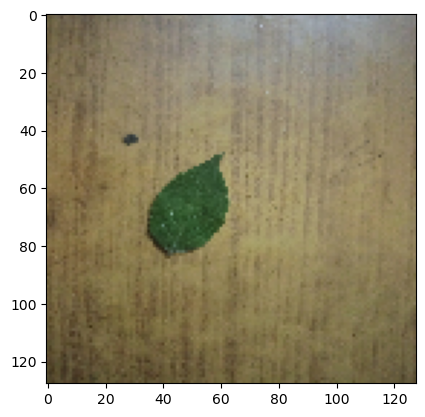

In [21]:
plt.imshow(data[4000])

# splitting 

In [22]:
x_train,x_test,y_train,y_test = train_test_split(data,result, test_size=0.2, shuffle=True, random_state=42)

# model building

In [23]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# compiling 

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
x_train.shape

(3396, 128, 128, 3)

In [27]:
y_train.shape

(3396, 3)

In [28]:
history = model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 806ms/step - accuracy: 0.3201 - loss: 10.5022
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 831ms/step - accuracy: 0.3485 - loss: 1.3452
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 920ms/step - accuracy: 0.3302 - loss: 1.2134
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 910ms/step - accuracy: 0.3477 - loss: 1.1059
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 911ms/step - accuracy: 0.3342 - loss: 1.1040
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 914ms/step - accuracy: 0.3561 - loss: 1.0976
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 989ms/step - accuracy: 0.3398 - loss: 1.0986
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.3558 - loss: 1.0980
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 999ms/step - accuracy: 0.3644 - loss: 1.0961
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 920ms/step - accuracy: 0.3424 - loss: 1.0992


In [29]:
score=model.evaluate(x_test,y_test,batch_size=64)
print("\n Test accuracy:%.1f%%"%(100.0*score[1]))

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.3180 - loss: 1.4805

 Test accuracy:32.6%


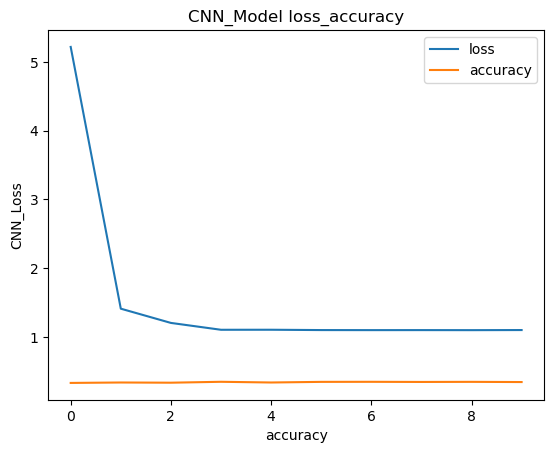

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('CNN_Model loss_accuracy')
plt.ylabel('CNN_Loss')
plt.xlabel('accuracy')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [71]:
def names(number):
    if number==0:
        return 'this is elachi'
    elif number== 1:
        return 'this is neem'
    else:
        return 'this is tulasi'

42.906153202056885% Confidence This Is this is elachi


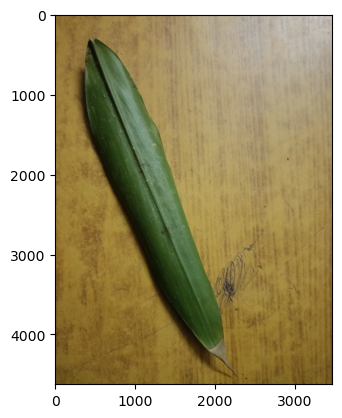

In [63]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\MEDICINAL PLANT\Elichi\IMG20240307173008.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

35.695505142211914% Confidence This Is this is tulasi


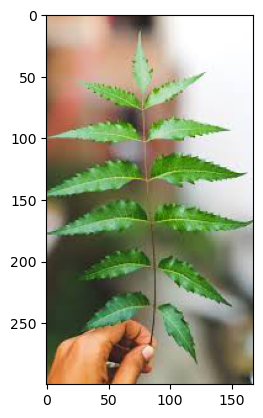

In [72]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Downloads\images.jpeg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

this is tulasi


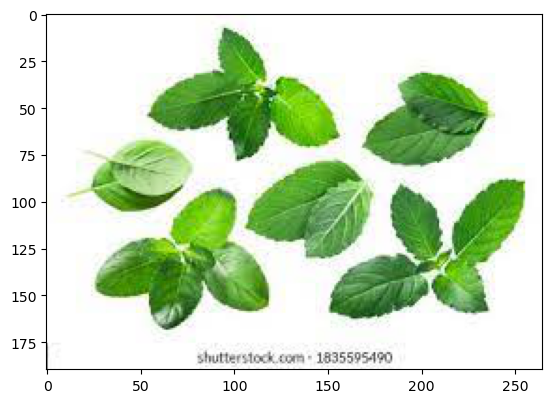

In [59]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Downloads\download.jpeg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))